In [119]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import ttest_ind
import matplotlib.ticker as mtick #For specifying the axes tick format 

In [120]:
df = pd.read_excel("physiotherapy.xlsx", index_col=0)

In [121]:
df.head()

,NAME,GENDER,AGE,WEIGHT,HEIGHT,Ht. (m),BMI,PRE OSWESTRY SCORE,POST OSWESTRY SCORE,PRE VAS,POST VAS,PRE FLEXIBLITY,POST FLEXIBLITY,PRE AGILITY,POST AGILITY,PRE BNOC,POST BNOC,PRE BFPS,POST BFPS,PRE BOBT,POST BOBT,PRE BT,POST BT,PREBR,POST BR,PREVO2,POSTVO2,PRE Core srength flexion,POST Core strength flexion,PRE Core strength extension,POST Core strength extenion,PRE Right lateral flexion,POST Right lateral flexion,PRE Left lateral flexion,POST left lateral flexion,PRE SPEED,POST SPEED
S.NO,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1.0,muskaan,f,18.0,55.0,159.0,1.590,21.755469,13.0,9.0,6.0,4.0,44.5,46.75,12.88,12.74,27.0,19.0,1.35,0.95,10.75,7.85,9.27,12.16,0.86,1.55,46.0,47.0,35.38,41.55,18.52,32.16,52.13,00:01:19.390000,55.89,12:01:15,35.12,28.85
2.0,sonal,f,19.0,58.6,154.0,1.540,24.709057,12.0,4.0,5.0,2.0,45.5,47.75,12.79,11.82,36.0,19.0,1.80,0.95,91.28,16.81,-71.27,3.21,-0.78,0.19,38.0,36.0,31.59,43.17,15.67,30.58,49.81,00:01:19,44.56,12:01:06,38.37,33.20
3.0,mukul,f,18.0,56.2,164.0,1.640,20.895300,10.0,6.0,5.0,3.0,43.5,46.50,11.85,10.26,24.0,15.0,1.20,0.75,-4.88,3.38,24.92,16.63,-5.11,4.92,47.0,49.0,34.65,43.59,25.21,28.72,50.64,00:01:17,54.15,12:01:12,31.62,24.31
4.0,laxmi,f,21.0,49.9,159.5,1.595,19.614587,9.0,4.0,3.0,2.0,31.0,42.50,12.31,11.42,23.0,14.0,1.15,0.70,39.29,17.87,-19.28,2.14,-0.49,0.12,43.0,42.0,25.95,36.86,16.37,23.61,47.43,00:01:16,45.45,00:01:13,35.90,32.73
5.0,prabhjot,f,18.0,58.8,158.0,1.580,23.553918,13.0,7.0,6.0,4.0,45.5,48.75,12.84,12.58,25.0,23.0,1.25,1.15,14.64,58.96,5.37,-38.95,0.37,-0.66,45.0,46.0,32.17,37.65,20.52,40.16,44.34,00:01:19,39.54,12:00:59,32.11,28.41


In [122]:
df.columns = df.columns.str.replace(' ', '_')

In [123]:
df.columns.values

array(['NAME', 'GENDER', 'AGE', 'WEIGHT', 'HEIGHT', 'Ht._(m)', 'BMI',
       'PRE_OSWESTRY_SCORE', 'POST_OSWESTRY_SCORE', 'PRE_VAS', 'POST_VAS',
       'PRE_FLEXIBLITY', 'POST_FLEXIBLITY', 'PRE_AGILITY', 'POST_AGILITY',
       '_PRE_BNOC', 'POST_BNOC', 'PRE_BFPS', 'POST_BFPS', 'PRE_BOBT',
       'POST_BOBT', 'PRE_BT', 'POST_BT', 'PREBR', 'POST_BR', 'PREVO2',
       'POSTVO2', 'PRE_Core_srength_flexion',
       'POST_Core_strength_flexion', 'PRE_Core_strength_extension',
       'POST_Core_strength_extenion', 'PRE_Right_lateral_flexion',
       'POST_Right_lateral_flexion', 'PRE_Left_lateral_flexion',
       'POST_left_lateral_flexion', 'PRE_SPEED', 'POST_SPEED'],
      dtype=object)

In [124]:
df.shape

(31, 37)

In [125]:
df.dtypes

NAME                            object
GENDER                          object
AGE                            float64
WEIGHT                         float64
HEIGHT                         float64
Ht._(m)                        float64
BMI                            float64
PRE_OSWESTRY_SCORE             float64
POST_OSWESTRY_SCORE            float64
PRE_VAS                        float64
POST_VAS                       float64
PRE_FLEXIBLITY                 float64
POST_FLEXIBLITY                float64
PRE_AGILITY                    float64
POST_AGILITY                   float64
_PRE_BNOC                      float64
POST_BNOC                      float64
PRE_BFPS                       float64
POST_BFPS                      float64
PRE_BOBT                       float64
POST_BOBT                      float64
PRE_BT                         float64
POST_BT                        float64
PREBR                          float64
POST_BR                        float64
PREVO2                   

In [126]:
pd.set_option('display.max_columns', 500)

In [127]:
df_1 = df.iloc[:15, :7]   # Group 1 patient details
df_1

,NAME,GENDER,AGE,WEIGHT,HEIGHT,Ht._(m),BMI
S.NO,,,,,,,
1.0,muskaan,f,18.0,55.0,159.0,1.590,21.755469
2.0,sonal,f,19.0,58.6,154.0,1.540,24.709057
3.0,mukul,f,18.0,56.2,164.0,1.640,20.895300
4.0,laxmi,f,21.0,49.9,159.5,1.595,19.614587
5.0,prabhjot,f,18.0,58.8,158.0,1.580,23.553918
6.0,anita,f,19.0,75.3,168.0,1.680,26.679422
7.0,manjeet,m,24.0,80.2,178.0,1.780,25.312461
8.0,ajay,m,21.0,64.9,172.5,1.725,21.810544
9.0,jaspal,m,19.0,77.0,169.5,1.695,26.801020


In [128]:
df_1.describe()    # Data Analysis of Group 1 

,AGE,WEIGHT,HEIGHT,Ht._(m),BMI
count,15.000000,15.000000,15.000000,15.000000,15.000000
mean,20.200000,67.273333,167.300000,1.673000,23.964991
std,2.366432,10.363291,7.279619,0.072796,2.882012
min,18.000000,49.900000,154.000000,1.540000,19.614587
25%,18.500000,58.700000,161.750000,1.617500,21.783006
50%,19.000000,66.700000,168.000000,1.680000,23.527612
75%,21.000000,75.450000,172.000000,1.720000,25.995941
max,25.000000,85.200000,179.000000,1.790000,30.187075


In [129]:
df1 = df.iloc[:15, 7:]   #For separating the first 15 entries into Group 1
df1

,PRE_OSWESTRY_SCORE,POST_OSWESTRY_SCORE,PRE_VAS,POST_VAS,PRE_FLEXIBLITY,POST_FLEXIBLITY,PRE_AGILITY,POST_AGILITY,_PRE_BNOC,POST_BNOC,PRE_BFPS,POST_BFPS,PRE_BOBT,POST_BOBT,PRE_BT,POST_BT,PREBR,POST_BR,PREVO2,POSTVO2,PRE_Core_srength_flexion,POST_Core_strength_flexion,PRE_Core_strength_extension,POST_Core_strength_extenion,PRE_Right_lateral_flexion,POST_Right_lateral_flexion,PRE_Left_lateral_flexion,POST_left_lateral_flexion,PRE_SPEED,POST_SPEED
S.NO,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1.0,13.0,9.0,6.0,4.0,44.50,46.75,12.88,12.74,27.0,19.0,1.35,0.95,10.75,7.85,9.27,12.16,0.86,1.55,46.0,47.0,35.38,41.55,18.52,32.16,52.13,00:01:19.390000,55.89,12:01:15,35.12,28.85
2.0,12.0,4.0,5.0,2.0,45.50,47.75,12.79,11.82,36.0,19.0,1.80,0.95,91.28,16.81,-71.27,3.21,-0.78,0.19,38.0,36.0,31.59,43.17,15.67,30.58,49.81,00:01:19,44.56,12:01:06,38.37,33.20
3.0,10.0,6.0,5.0,3.0,43.50,46.50,11.85,10.26,24.0,15.0,1.20,0.75,-4.88,3.38,24.92,16.63,-5.11,4.92,47.0,49.0,34.65,43.59,25.21,28.72,50.64,00:01:17,54.15,12:01:12,31.62,24.31
4.0,9.0,4.0,3.0,2.0,31.00,42.50,12.31,11.42,23.0,14.0,1.15,0.70,39.29,17.87,-19.28,2.14,-0.49,0.12,43.0,42.0,25.95,36.86,16.37,23.61,47.43,00:01:16,45.45,00:01:13,35.90,32.73
5.0,13.0,7.0,6.0,4.0,45.50,48.75,12.84,12.58,25.0,23.0,1.25,1.15,14.64,58.96,5.37,-38.95,0.37,-0.66,45.0,46.0,32.17,37.65,20.52,40.16,44.34,00:01:19,39.54,12:00:59,32.11,28.41
6.0,12.0,9.0,5.0,4.0,46.25,47.75,13.44,13.20,31.0,22.0,1.55,0.09,21.18,230.07,-1.16,6.48,-0.05,0.03,32.0,35.0,27.65,42.03,16.13,25.49,45.61,00:01:15,49.39,00:01:08,33.02,27.15
7.0,14.0,17.0,4.0,6.0,43.25,43.50,11.35,11.27,32.0,29.0,1.60,1.45,29.41,-9.20,-9.39,29.22,-0.32,-3.18,67.0,65.0,26.32,34.36,14.32,29.17,43.69,00:01:14,42.19,00:01:11,24.61,18.30
8.0,13.0,8.0,3.0,3.0,40.00,43.50,11.02,10.85,35.0,27.0,1.75,1.35,45.32,2.86,-25.31,17.15,-0.56,6.00,55.0,58.0,26.66,38.94,15.68,41.18,46.75,00:01:13,40.15,00:01:16.950000,30.43,26.09
9.0,11.0,5.0,4.0,3.0,30.50,38.50,12.16,11.21,31.0,25.0,1.55,1.25,45.98,45.15,-25.97,-25.14,-0.56,-0.56,54.0,53.0,39.71,47.48,20.17,40.15,50.26,00:01:16,46.11,00:00:57.350000,32.63,29.47


In [130]:
df_2 = df.iloc[16:, :7]   # Group 1 patient details
df_2

,NAME,GENDER,AGE,WEIGHT,HEIGHT,Ht._(m),BMI
S.NO,,,,,,,
16.0,ranjeet,m,23.0,76.6,171.5,1.715,26.043570
17.0,amarjeet,m,25.0,83.2,166.5,1.665,30.011994
18.0,gurpreet,m,19.0,75.6,171.5,1.715,25.703576
19.0,meharpreet,f,20.0,56.4,159.5,1.595,22.169593
20.0,harmandeep,m,19.0,78.7,174.5,1.745,25.845436
21.0,amla,f,21.0,68.2,1705.0,17.050,0.234604
22.0,sushikala,f,20.0,48.4,154.0,1.540,20.408163
23.0,keshav,m,19.0,66.5,179.5,1.795,20.639194
24.0,sahil,m,19.0,57.6,180.0,1.800,17.777778


In [131]:
df_2.describe()  # Data Analysis of Group 2 

,AGE,WEIGHT,HEIGHT,Ht._(m),BMI
count,15.000000,15.000000,15.000000,15.000000,15.000000
mean,20.266667,64.426667,268.966667,2.689667,21.579013
std,1.791514,10.916924,397.359295,3.973593,6.634739
min,18.000000,48.400000,154.000000,1.540000,0.234604
25%,19.000000,56.450000,159.000000,1.590000,20.620332
50%,20.000000,58.300000,167.500000,1.675000,22.169593
75%,21.000000,74.900000,174.000000,1.740000,25.176448
max,25.000000,83.200000,1705.000000,17.050000,30.011994


In [132]:
df2 = df.iloc[16:, 7:]   #For separating the last 15 entries into Group 2
df2

,PRE_OSWESTRY_SCORE,POST_OSWESTRY_SCORE,PRE_VAS,POST_VAS,PRE_FLEXIBLITY,POST_FLEXIBLITY,PRE_AGILITY,POST_AGILITY,_PRE_BNOC,POST_BNOC,PRE_BFPS,POST_BFPS,PRE_BOBT,POST_BOBT,PRE_BT,POST_BT,PREBR,POST_BR,PREVO2,POSTVO2,PRE_Core_srength_flexion,POST_Core_strength_flexion,PRE_Core_strength_extension,POST_Core_strength_extenion,PRE_Right_lateral_flexion,POST_Right_lateral_flexion,PRE_Left_lateral_flexion,POST_left_lateral_flexion,PRE_SPEED,POST_SPEED
S.NO,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
16.0,14.0,19.0,4.0,6.0,32.50,30.75,11.76,12.13,27.0,23.0,1.35,0.05,33.34,515.11,-13.33,-4.03,-0.40,-0.01,48.0,49.0,27.19,28.31,17.91,19.16,00:00:51.730000,00:00:56.730000,00:00:49.120000,00:00:53.730000,20.32,16.20
17.0,16.0,13.0,5.0,4.0,42.50,43.25,10.56,11.08,28.0,22.0,1.40,1.10,25.31,44.03,-5.29,-24.02,-0.21,-0.55,50.0,52.0,31.18,36.08,19.43,24.67,00:00:53.180000,00:00:59.320000,00:00:52.610000,00:00:55.150000,19.45,15.62
18.0,14.0,17.0,3.0,3.0,48.50,46.50,11.39,11.51,22.0,29.0,1.10,1.35,-4.04,-3.36,24.06,23.37,-5.95,-6.96,48.0,47.0,35.16,38.19,26.61,32.54,00:00:59.650000,00:01:08,00:00:57.190000,00:01:11,19.93,16.15
19.0,15.0,12.0,4.0,2.0,22.50,23.25,12.56,12.38,33.0,27.0,1.65,1.35,55.64,-3.36,-35.63,23.37,-0.64,-6.96,39.0,39.0,30.54,34.47,18.31,25.73,00:00:44.680000,00:00:48.300000,00:00:39.230000,00:00:42.270000,34.40,36.76
20.0,13.0,15.0,4.0,6.0,48.50,48.50,11.49,11.04,32.0,29.0,1.60,1.45,35.66,34.02,-15.65,-14.01,-0.44,-0.41,57.0,59.0,36.67,39.98,27.32,33.35,00:00:55.120000,00:01:03,00:00:49.740000,00:00:57.300000,25.51,21.93
21.0,14.0,6.0,2.0,0.0,25.50,29.00,13.13,12.56,39.0,35.0,1.95,1.75,87.50,45.32,-67.48,-25.31,-0.77,-0.56,37.0,36.0,24.35,27.04,13.38,29.46,00:00:51.670000,00:00:59.300000,00:00:46.510000,00:00:53.650000,34.64,31.98
22.0,16.0,12.0,3.0,1.0,41.00,44.50,11.48,11.02,26.0,20.0,1.30,1.01,56.99,5.74,-36.98,14.28,-0.65,2.49,40.0,41.0,29.84,32.32,21.43,27.96,00:00:47.290000,00:00:52.500000,00:00:45.320000,00:00:53.250000,27.90,20.11
23.0,15.0,16.0,4.0,2.0,46.50,47.75,12.14,11.88,37.0,30.0,1.85,1.50,21.13,30.57,-1.12,-10.55,-0.05,-0.35,58.0,60.0,30.16,40.25,19.93,24.83,00:00:58.190000,00:01:11.600000,00:00:54.320000,00:00:59.540000,28.75,23.30
24.0,12.0,14.0,5.0,5.0,21.50,22.50,11.83,12.05,29.0,23.0,1.45,1.15,50.63,39.29,-30.62,-19.28,-0.60,-0.49,56.0,58.0,36.53,41.31,24.67,28.12,00:00:51.320000,00:00:56.120000,00:00:49.370000,00:00:54.810000,31.74,25.16


In [133]:
df1.describe()   # Mean & Std of every attribute of Group 1 can be viewed from this table

,PRE_OSWESTRY_SCORE,POST_OSWESTRY_SCORE,PRE_VAS,POST_VAS,PRE_FLEXIBLITY,POST_FLEXIBLITY,PRE_AGILITY,POST_AGILITY,_PRE_BNOC,POST_BNOC,PRE_BFPS,POST_BFPS,PRE_BOBT,POST_BOBT,PRE_BT,POST_BT,PREBR,POST_BR,PREVO2,POSTVO2,PRE_Core_srength_flexion,POST_Core_strength_flexion,PRE_Core_strength_extension,POST_Core_strength_extenion,PRE_SPEED,POST_SPEED
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,11.800000,6.933333,4.133333,2.666667,39.300000,43.383333,12.042000,11.494667,29.866667,22.066667,1.493333,1.03600,30.476000,29.576000,-9.795333,4.878667,-0.738667,0.037333,49.533333,50.666667,31.511333,40.986667,18.916000,34.291333,31.184000,26.172667
std,1.473577,4.802777,1.187234,1.759329,7.498928,5.630645,0.726776,0.863646,3.997618,4.399134,0.199881,0.34186,25.593473,60.109566,25.677091,23.173794,1.503481,2.787284,8.467304,8.591247,5.139868,4.110959,3.447348,6.043381,4.130698,4.314101
min,9.000000,2.000000,2.000000,0.000000,25.500000,30.500000,11.020000,10.150000,23.000000,14.000000,1.150000,0.09000,-9.200000,-33.800000,-71.270000,-38.950000,-5.110000,-5.680000,32.000000,35.000000,22.740000,34.360000,14.320000,23.610000,24.610000,18.300000
25%,10.500000,4.000000,3.000000,1.500000,31.500000,40.500000,11.475000,10.980000,28.000000,19.000000,1.400000,0.90000,13.885000,3.120000,-22.295000,-5.290000,-0.620000,-0.610000,45.500000,46.500000,27.155000,38.010000,15.905000,29.875000,27.790000,23.815000
50%,12.000000,5.000000,4.000000,3.000000,43.250000,44.250000,11.850000,11.350000,30.000000,23.000000,1.500000,1.15000,29.410000,16.810000,-7.780000,4.310000,-0.440000,0.030000,49.000000,51.000000,31.590000,41.550000,18.580000,35.640000,31.620000,26.110000
75%,13.000000,8.500000,5.000000,4.000000,45.000000,47.250000,12.620000,11.900000,31.500000,25.000000,1.575000,1.25000,42.305000,36.425000,6.130000,16.890000,-0.165000,0.230000,54.500000,56.500000,35.015000,43.305000,20.345000,39.930000,34.070000,28.735000
max,14.000000,18.000000,6.000000,6.000000,48.500000,51.500000,13.440000,13.200000,36.000000,29.000000,1.800000,1.45000,91.280000,230.070000,29.220000,53.820000,0.860000,6.000000,67.000000,65.000000,39.710000,49.030000,25.670000,42.300000,38.370000,33.200000


In [134]:
df2.describe()   # Mean & Std of of every attribute Group 2 can be viewed from this table

,PRE_OSWESTRY_SCORE,POST_OSWESTRY_SCORE,PRE_VAS,POST_VAS,PRE_FLEXIBLITY,POST_FLEXIBLITY,PRE_AGILITY,POST_AGILITY,_PRE_BNOC,POST_BNOC,PRE_BFPS,POST_BFPS,PRE_BOBT,POST_BOBT,PRE_BT,POST_BT,PREBR,POST_BR,PREVO2,POSTVO2,PRE_Core_srength_flexion,POST_Core_strength_flexion,PRE_Core_strength_extension,POST_Core_strength_extenion,PRE_SPEED,POST_SPEED
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,14.933333,14.666667,3.666667,3.466667,38.383333,39.466667,12.04800,11.951333,30.400000,27.400000,1.520000,1.290667,41.198000,61.114667,-21.452000,-9.697333,-0.846667,-1.115333,44.000000,44.533333,30.219333,33.851333,20.193333,26.609333,30.092000,25.489333
std,3.594970,3.618734,1.345185,1.726543,8.837252,8.874556,0.83679,0.859534,5.025649,6.367327,0.251282,0.463318,21.262745,126.923318,21.283121,18.023723,1.425962,2.505499,9.403647,10.070230,4.155666,4.921775,4.743937,4.608003,6.324784,7.094789
min,10.000000,6.000000,1.000000,0.000000,21.500000,22.500000,10.56000,10.190000,22.000000,19.000000,1.100000,0.050000,-4.040000,-3.360000,-67.480000,-30.620000,-5.950000,-6.960000,32.000000,31.000000,23.150000,25.360000,13.380000,17.720000,19.450000,15.620000
25%,13.000000,12.500000,3.000000,2.500000,35.750000,34.000000,11.48500,11.295000,27.500000,22.500000,1.375000,1.100000,29.325000,15.215000,-33.125000,-24.020000,-0.645000,-0.580000,36.000000,36.000000,27.430000,30.835000,16.500000,24.515000,26.705000,19.805000
50%,14.000000,15.000000,4.000000,4.000000,41.000000,42.750000,12.14000,12.130000,30.000000,27.000000,1.500000,1.350000,40.840000,38.950000,-22.470000,-14.730000,-0.550000,-0.550000,40.000000,41.000000,30.160000,34.250000,19.430000,26.320000,31.740000,25.160000
75%,16.000000,16.500000,4.500000,4.500000,43.125000,46.000000,12.69500,12.445000,32.500000,29.500000,1.625000,1.475000,53.135000,44.675000,-9.310000,0.150000,-0.420000,-0.380000,52.000000,52.500000,33.070000,37.135000,24.895000,29.915000,34.615000,31.425000
max,25.000000,20.000000,6.000000,6.000000,48.500000,48.500000,13.13000,13.380000,39.000000,42.000000,1.950000,2.100000,87.500000,515.110000,24.060000,23.370000,-0.050000,2.490000,58.000000,60.000000,36.670000,41.310000,27.320000,33.350000,38.740000,36.760000


## Correlation Calculation

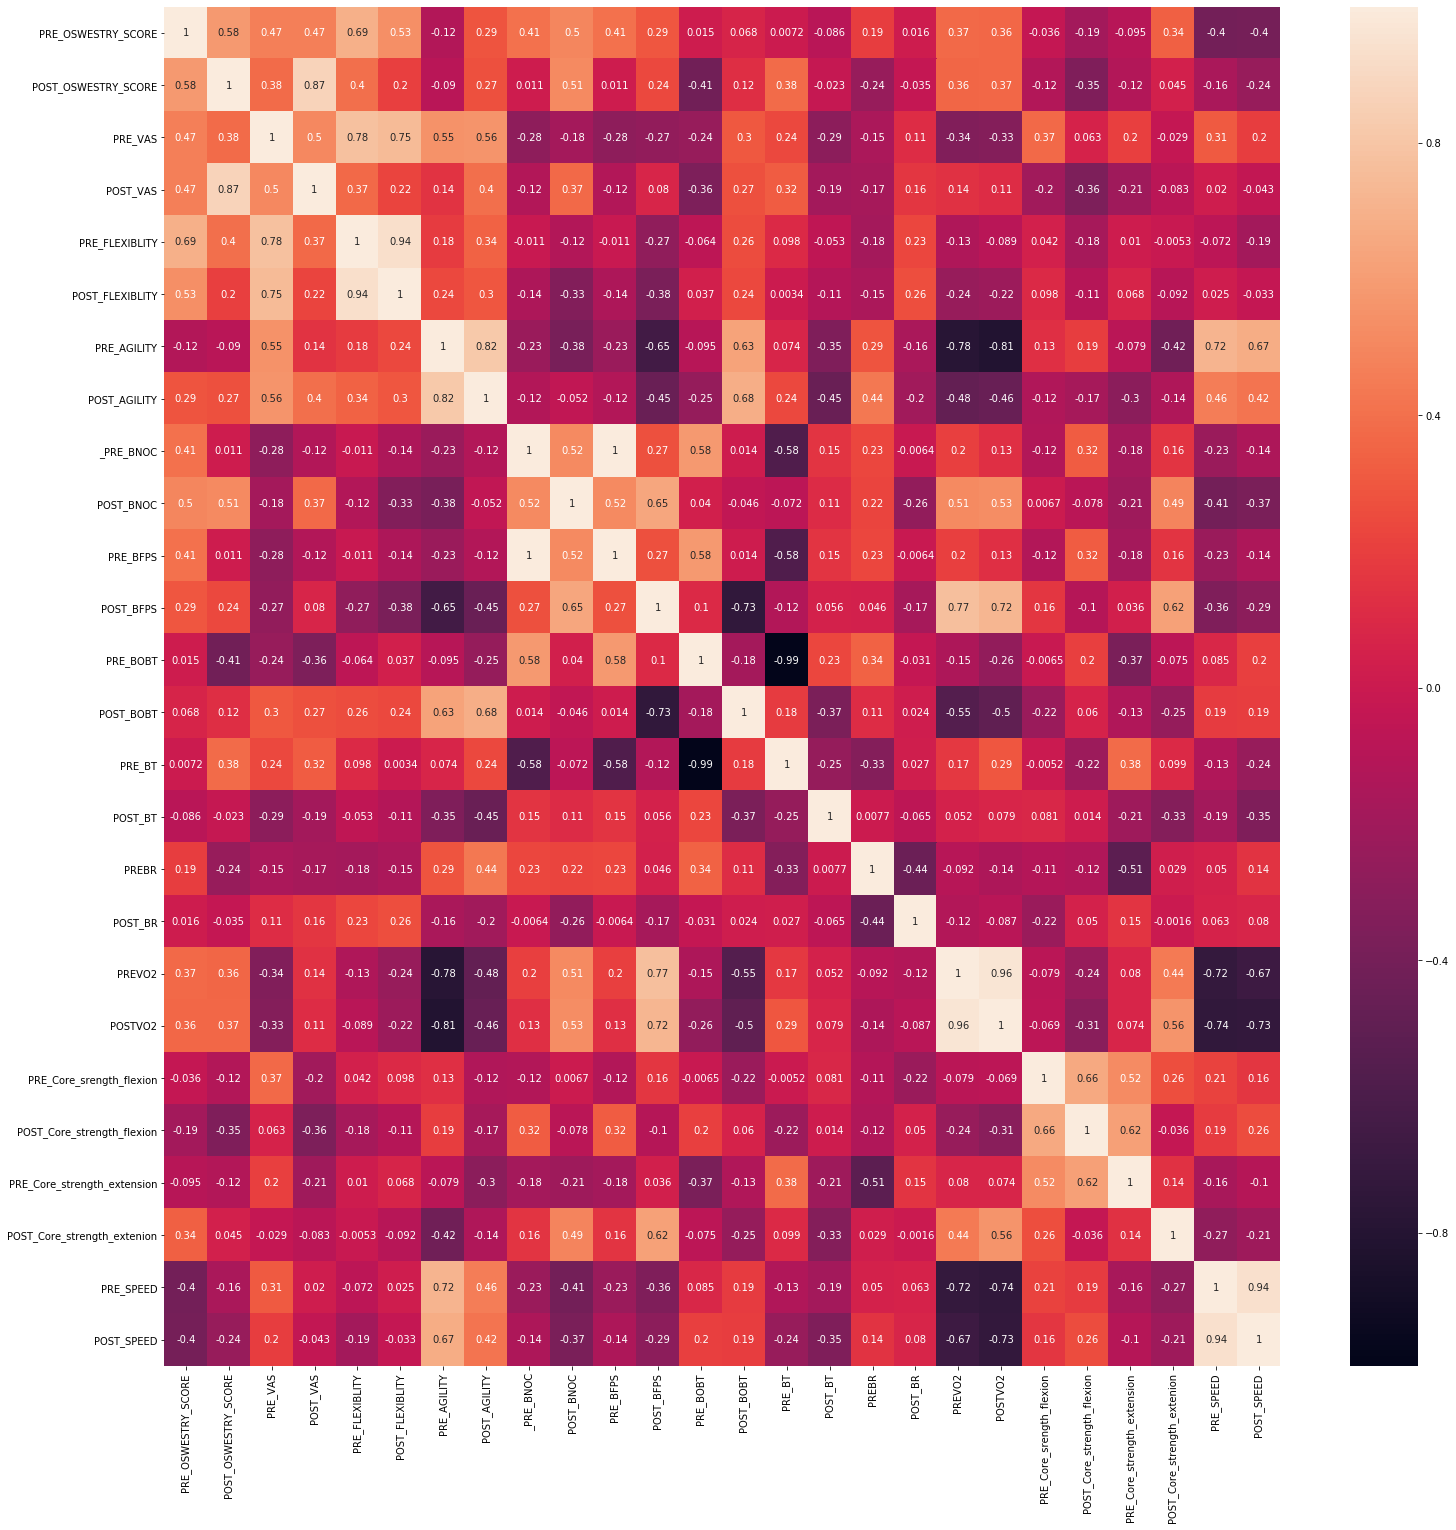

In [135]:
# Correlation of all the attributes of Group 1

plt.figure(figsize = (25,25))
sns.heatmap(df1.corr(), annot=True)


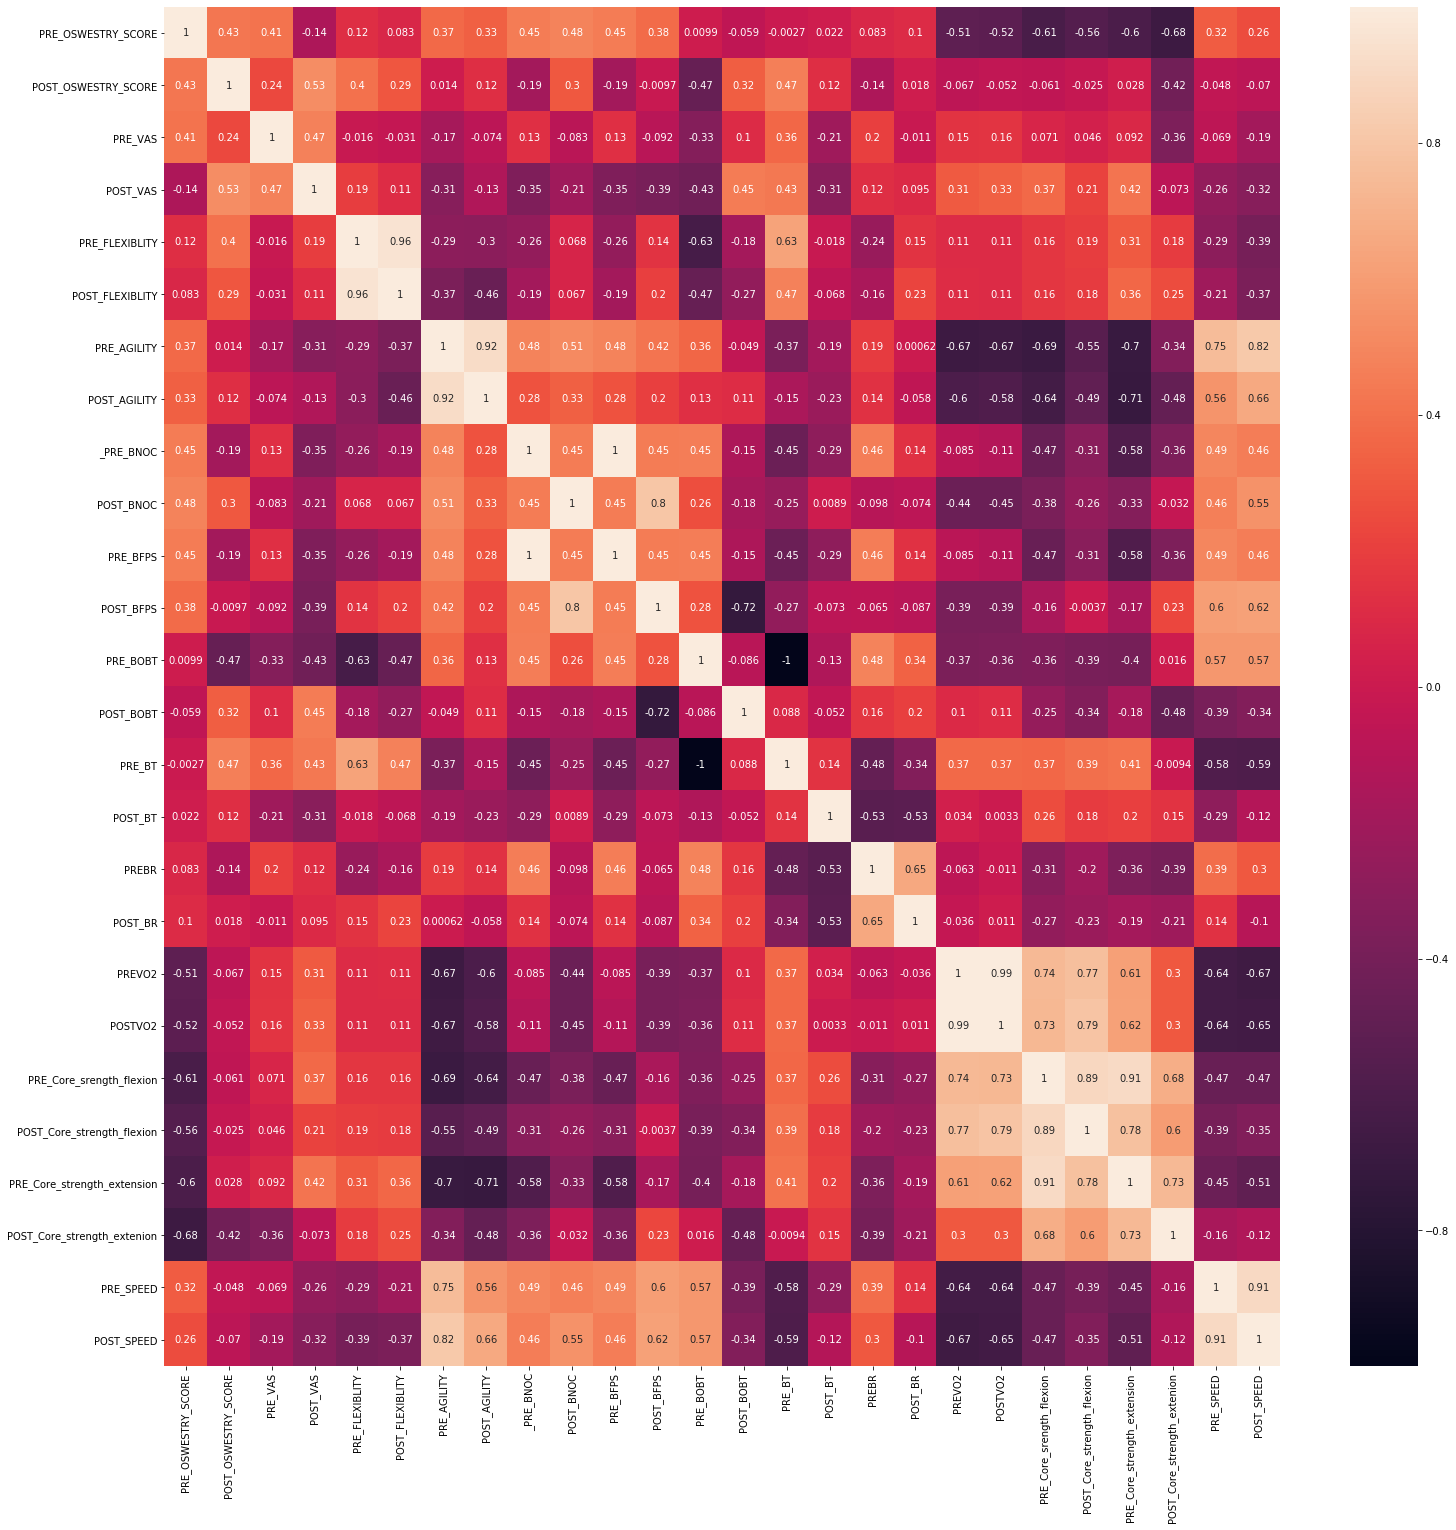

In [136]:
# Correlation of all the attributes of Group 2

plt.figure(figsize = (25,25))
sns.heatmap(df2.corr(), annot=True)


Text(0.5, 1, 'Group 1')

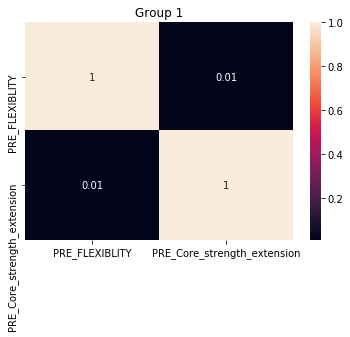

In [137]:
#Group 1 correlation b/w PRE_FLEXIBLITY & PRE_Core_strength_extension

sns.heatmap(df1[['PRE_FLEXIBLITY','PRE_Core_strength_extension']].corr(), annot=True)
plt.title('Group 1')

Text(0.5, 1, 'Group 1')

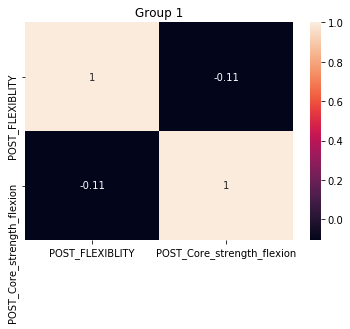

In [138]:
#Group 1 correlation b/w POST_FLEXIBLITY & POST_Core_strength_extension

sns.heatmap(df1[['POST_FLEXIBLITY','POST_Core_strength_flexion']].corr(), annot=True)
plt.title('Group 1')

Text(0.5, 1, 'Group 2')

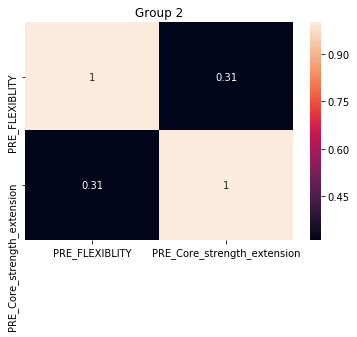

In [139]:
#Group 2 correlation b/w PRE_FLEXIBLITY & PRE_Core_strength_extension

sns.heatmap(df2[['PRE_FLEXIBLITY','PRE_Core_strength_extension']].corr(), annot=True)
plt.title('Group 2')

Text(0.5, 1, 'Group 2')

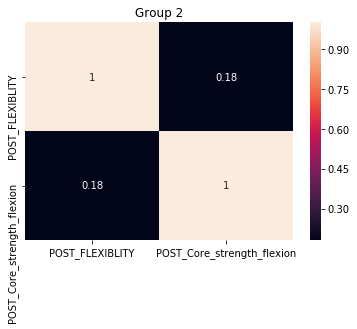

In [140]:
#Group 1 correlation b/w POST_FLEXIBLITY & POST_Core_strength_extension

sns.heatmap(df2[['POST_FLEXIBLITY','POST_Core_strength_flexion']].corr(), annot=True)
plt.title('Group 2')

Text(0.5, 1, 'Group 1')

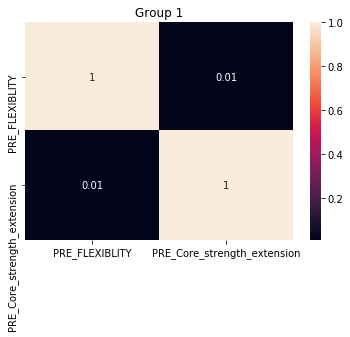

In [141]:
#Group 1 correlation b/w PRE_FLEXIBLITY & PRE_Core_strength_extension

sns.heatmap(df1[['PRE_FLEXIBLITY','PRE_Core_strength_extension']].corr(), annot=True)
plt.title('Group 1')

## Paired T test And P-value

In [142]:
#OSWESTRY_SCORE

stat, p = ttest_ind(df1['PRE_OSWESTRY_SCORE'], df1['POST_OSWESTRY_SCORE'])
print('Group 1 : t=%.3f, p=%.3f' % (stat, p))
stat_2, p_2 = ttest_ind(df2['PRE_OSWESTRY_SCORE'], df2['POST_OSWESTRY_SCORE'])
print('Group 2 : t=%.3f, p=%.3f' % (stat_2, p_2))

Group 1 : t=3.752, p=0.001
Group 2 : t=0.202, p=0.841


In [143]:
#PRE_VAS

stat, p = ttest_ind(df1['PRE_VAS'], df1['POST_VAS'])
print('Group 1 : t=%.3f, p=%.3f' % (stat, p))
stat_2, p_2 = ttest_ind(df2['PRE_VAS'], df2['POST_VAS'])
print('Group 2 : t=%.3f, p=%.3f' % (stat_2, p_2))

Group 1 : t=2.676, p=0.012
Group 2 : t=0.354, p=0.726


In [144]:
#PRE_FLEXIBLITY

stat, p = ttest_ind(df1['PRE_FLEXIBLITY'], df1['PRE_FLEXIBLITY'])
print('Group 1 : t=%.3f, p=%.3f' % (stat, p))
stat_2, p_2 = ttest_ind(df2['PRE_FLEXIBLITY'], df2['PRE_FLEXIBLITY'])
print('Group 2 : t=%.3f, p=%.3f' % (stat_2, p_2))

Group 1 : t=0.000, p=1.000
Group 2 : t=0.000, p=1.000


In [145]:
#AGILITY

stat, p = ttest_ind(df1['PRE_AGILITY'], df1['POST_AGILITY'])
print('Group 1 : t=%.3f, p=%.3f' % (stat, p))
stat_2, p_2 = ttest_ind(df2['PRE_AGILITY'], df2['POST_AGILITY'])
print('Group 2 : t=%.3f, p=%.3f' % (stat_2, p_2))

Group 1 : t=1.878, p=0.071
Group 2 : t=0.312, p=0.757


In [146]:
#BNOC

stat, p = ttest_ind(df1['_PRE_BNOC'], df1['POST_BNOC'])
print('Group 1 : t=%.3f, p=%.3f' % (stat, p))
stat_2, p_2 = ttest_ind(df2['_PRE_BNOC'], df2['POST_BNOC'])
print('Group 2 : t=%.3f, p=%.3f' % (stat_2, p_2))

Group 1 : t=5.082, p=0.000
Group 2 : t=1.432, p=0.163


In [147]:
#BFPS

stat, p = ttest_ind(df1['PRE_BFPS'], df1['POST_BFPS'])
print('Group 1 : t=%.3f, p=%.3f' % (stat, p))
stat_2, p_2 = ttest_ind(df2['PRE_BFPS'], df2['POST_BFPS'])
print('Group 2 : t=%.3f, p=%.3f' % (stat_2, p_2))

Group 1 : t=4.473, p=0.000
Group 2 : t=1.685, p=0.103


In [148]:
#BOBT

stat, p = ttest_ind(df1['PRE_BOBT'], df1['POST_BOBT'])
print('Group 1 : t=%.3f, p=%.3f' % (stat, p))
stat_2, p_2 = ttest_ind(df2['PRE_BOBT'], df2['POST_BOBT'])
print('Group 2 : t=%.3f, p=%.3f' % (stat_2, p_2))

Group 1 : t=0.053, p=0.958
Group 2 : t=-0.599, p=0.554


In [149]:
#BT

stat, p = ttest_ind(df1['PRE_BT'], df1['POST_BT'])
print('Group 1 : t=%.3f, p=%.3f' % (stat, p))
stat_2, p_2 = ttest_ind(df2['PRE_BT'], df2['POST_BT'])
print('Group 2 : t=%.3f, p=%.3f' % (stat_2, p_2))

Group 1 : t=-1.643, p=0.112
Group 2 : t=-1.632, p=0.114


In [150]:
#BR

stat, p = ttest_ind(df1['PREBR'], df1['POST_BR'])
print('Group 1 : t=%.3f, p=%.3f' % (stat, p))
stat_2, p_2 = ttest_ind(df2['PREBR'], df2['POST_BR'])
print('Group 2 : t=%.3f, p=%.3f' % (stat_2, p_2))

Group 1 : t=-0.949, p=0.351
Group 2 : t=0.361, p=0.721


In [151]:
#VO2

stat, p = ttest_ind(df1['PREVO2'], df1['POSTVO2'])
print('Group 1 : t=%.3f, p=%.3f' % (stat, p))
stat_2, p_2 = ttest_ind(df2['PREVO2'], df2['POSTVO2'])
print('Group 2 : t=%.3f, p=%.3f' % (stat_2, p_2))

Group 1 : t=-0.364, p=0.719
Group 2 : t=-0.150, p=0.882


In [152]:
#Core strength flexion

stat, p = ttest_ind(df1['PRE_Core_srength_flexion'], df1['POST_Core_strength_flexion'])
print('Group 1 : t=%.3f, p=%.3f' % (stat, p))
stat_2, p_2 = ttest_ind(df2['PRE_Core_srength_flexion'], df2['POST_Core_strength_flexion'])
print('Group 2 : t=%.3f, p=%.3f' % (stat_2, p_2))

Group 1 : t=-5.576, p=0.000
Group 2 : t=-2.184, p=0.038


In [153]:
#Core_strength_extension

stat, p = ttest_ind(df1['PRE_Core_strength_extension'], df1['POST_Core_strength_extenion'])
print('Group 1 : t=%.3f, p=%.3f' % (stat, p))
stat_2, p_2 = ttest_ind(df2['PRE_Core_strength_extension'], df2['POST_Core_strength_extenion'])
print('Group 2 : t=%.3f, p=%.3f' % (stat_2, p_2))

Group 1 : t=-8.559, p=0.000
Group 2 : t=-3.757, p=0.001


In [154]:
#SPEED

stat, p = ttest_ind(df1['PRE_SPEED'], df1['POST_SPEED'])
print('Group 1 : t=%.3f, p=%.3f' % (stat, p))
stat_2, p_2 = ttest_ind(df2['PRE_SPEED'], df2['POST_SPEED'])
print('Group 2 : t=%.3f, p=%.3f' % (stat_2, p_2))

Group 1 : t=3.250, p=0.003
Group 2 : t=1.876, p=0.071
